# ClusterAI: Desafio Voice

El siguiente desafio tiene el objetivo de lograr el mejor resultado de clasificacion. Para eso deberan:
- Importar las librerias que consideren necesarias.
- Importar el dataset.
- Realizar los pre-procesamientos que consideren necesarios.
- Realizar la visualizacion o estadistica descriptiva que consideren necesaria.
- Aplicar feature selection (o no) para luego usar esas features en un modelo clasificador.
- Entrenar un modelo supervisado de clasificacion y reportar los resultados.
- Las etiquetas de cada muestra estan en la ultima columna "label"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold

# DATASET - INTRO

In [4]:
pwd

'C:\\Users\\norni\\OneDrive\\Desktop\\Python\\Competencias\\Voice'

In [5]:
voice = pd.read_csv(r'C:\\Users\\norni\\OneDrive\\Desktop\\Python\\Competencias\\Voice\clusterai_2019_desafio_dataset_voice.csv')

In [6]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
np.shape(voice)

(3168, 21)

In [8]:
voice.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

#  PREPARATION

In [9]:
x = voice.iloc[:,0:20]
y = voice.iloc[:,20]

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [11]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
print("Male = 1 - Female = 0")

Male = 1 - Female = 0


# SPLIT TRAIN - TEST

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4)
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)
np.shape(xtest_scal)

(951, 20)

# THRESHOLD - FEATURE SELECTION ((DUDA DE SCAL))

In [15]:
thresh = 0.5
xtrain_scal_red_var = xtrain.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]
xtest_scal_red_var = xtest.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]

In [16]:
print("Cantidad de Feautures " + str(np.shape(xtrain_scal_red_var)[1]))

Cantidad de Feautures 10


In [17]:
np.shape(xtest_scal_red_var)

(951, 10)

In [18]:
voice_threshold = voice.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]
voice_threshold.head(1)

,Q25,skew,kurt,sfm,mode,meandom,mindom,maxdom,dfrange,modindx
0,0.015071,12.863462,274.402906,0.491918,0.0,0.007812,0.007812,0.007812,0.0,0.0


# LASSO - FEATURE SELECTION

In [19]:
lasso_featsel = Lasso(alpha = 0.01)
lasso_featsel.fit(xtrain_scal,ytrain)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
Features = int(np.count_nonzero(lasso_featsel.coef_))
print("Cantidad de Features "+ str(Features))

Cantidad de Features 8


In [21]:
lasso_cols = lasso_featsel.coef_ != 0
np.where(lasso_cols)

(array([ 4,  5,  6,  9, 10, 12, 13, 14], dtype=int64),)

In [22]:
xtrain_scal_red_lasso = xtrain_scal[:, lasso_cols]
np.shape(xtrain_scal_red_lasso)

(2217, 8)

In [23]:
xtest_scal_red_lasso = xtest_scal[:, lasso_cols]
np.shape(xtest_scal_red_lasso)

(951, 8)

In [24]:
voice_lasso = voice.iloc[:,[4,5,6,9,10,12,13,14]]
voice_lasso.head(1)

,Q75,IQR,skew,sfm,mode,meanfun,minfun,maxfun
0,0.090193,0.075122,12.863462,0.491918,0.0,0.084279,0.015702,0.275862


# RFE - FEATURE SELECTION

In [25]:
rfe = svm.SVC(C=50, kernel="linear")
rfecv = RFECV(estimator=rfe, step=1, cv=5, scoring='accuracy')
rfecv.fit(xtrain_scal, ytrain)

RFECV(cv=5,
      estimator=SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3,
                    gamma='auto_deprecated', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [26]:
print("Cantidad de Features " + str(rfecv.n_features_))

Cantidad de Features 9


In [27]:
xtrain_scal_red_rfe = xtrain_scal[:,rfecv.support_]
np.shape(xtrain_scal_red_rfe)

(2217, 9)

In [28]:
xtest_scal_red_rfe = xtest_scal[:,rfecv.support_]
np.shape(xtest_scal_red_rfe)

(951, 9)

In [29]:
voice_rfe = voice.iloc[:,rfecv.support_]
voice_rfe.head(1)

,Q25,Q75,IQR,skew,sp.ent,sfm,centroid,meanfun,minfun
0,0.015071,0.090193,0.075122,12.863462,0.893369,0.491918,0.059781,0.084279,0.015702


# FEATURE COMPARISON

In [30]:
print("Features de THRESHOLD [10]")
print(voice_threshold.columns)
print()
print("Features de LASSO [8]")
print(voice_lasso.columns)
print()
print("Features de RFE [9]")
print(voice_rfe.columns)

Features de THRESHOLD [10]
Index(['Q25', 'skew', 'kurt', 'sfm', 'mode', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx'],
      dtype='object')

Features de LASSO [8]
Index(['Q75', 'IQR', 'skew', 'sfm', 'mode', 'meanfun', 'minfun', 'maxfun'], dtype='object')

Features de RFE [9]
Index(['Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'centroid', 'meanfun',
       'minfun'],
      dtype='object')


# --> SVM x 4 <--

In [31]:
parameters = {'C':[1]}
svc = svm.SVC(kernel='linear',probability = True)
svm_cv = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)

# NO FEATURE SELECTION

In [32]:
svm_cv.fit(xtrain,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=True, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
print("Los mejores parametros son: ",svm_cv.best_params_, svm_cv.best_score_)

Los mejores parametros son:  {'C': 1} 0.914298601714028


In [34]:
ypred_svm = svm_cv.predict(xtrain) 
svm_score_train = accuracy_score(ytrain,ypred_svm)
print("El Accuracy Train sin Feature Selection es " + str(svm_score_train))

El Accuracy Train sin Feature Selection es 0.9192602616147948


In [35]:
ypred_svm = svm_cv.predict(xtest) 
svm_score_test = accuracy_score(ytest,ypred_svm)
print("El Accuracy Test sin Feature Selection es " + str(svm_score_test))

El Accuracy Test sin Feature Selection es 0.9169295478443743


In [36]:
yproba_svm = svm_cv.predict_proba(xtest)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba_svm[:,1], drop_intermediate = False)
auc_svm = metrics.auc(fpr1, tpr1)
print("El AUC sin Feature Selection es = " + str(auc_svm))

El AUC sin Feature Selection es = 0.9808444373661764


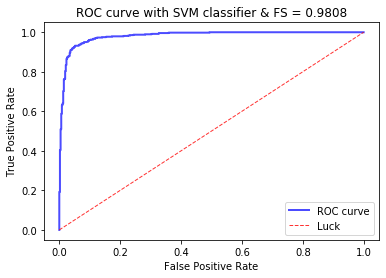

In [37]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with SVM classifier & FS = '+str(np.round(auc_svm,4)))
plt.show()

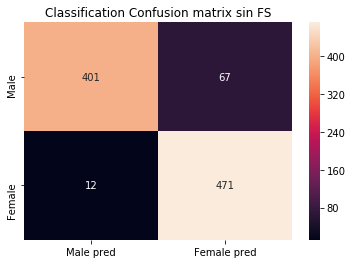

In [38]:
cm_svm = confusion_matrix(ytest, ypred_svm)
df_svm = pd.DataFrame(cm_svm, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_svm, annot=True, fmt='g')
plt.title('Classification Confusion matrix sin FS')
plt.show()

# THRESHOLD

In [39]:
svm_cv.fit(xtrain_scal_red_var,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=True, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
print("Los mejores parametros son: ",svm_cv.best_params_, svm_cv.best_score_)

Los mejores parametros son:  {'C': 1} 0.8290482634190347


In [41]:
ypred_svm_train_t = svm_cv.predict(xtrain_scal_red_var) 
svm_score_train_t = accuracy_score(ytrain,ypred_svm_train_t)
print("El Accuracy Train con Threshold es " + str(svm_score_train_t))

El Accuracy Train con Threshold es 0.8452864230942715


In [42]:
ypred_svm_test_t = svm_cv.predict(xtest_scal_red_var) 
svm_score_test_t = accuracy_score(ytest,ypred_svm_test_t)
print("El Accuracy Test con Threshold es " + str(svm_score_test_t))

El Accuracy Test con Threshold es 0.832807570977918


In [43]:
yproba_svm_test_t = svm_cv.predict_proba(xtest_scal_red_var)
fpr2, tpr2, thresholds = roc_curve(ytest.astype('int'), yproba_svm_test_t[:,1], drop_intermediate = False)
auc_svm_t = metrics.auc(fpr2, tpr2)
print("El AUC con Threshold es = " + str(auc_svm_t))

El AUC con Threshold es = 0.8476292226292227


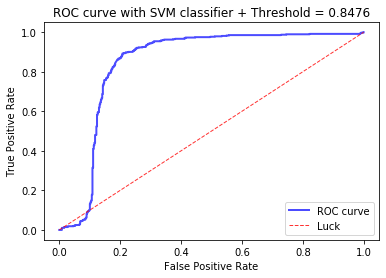

In [44]:
plt.plot(fpr2, tpr2, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with SVM classifier + Threshold = '+str(np.round(auc_svm_t,4)))
plt.show()

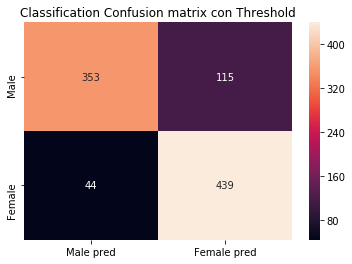

In [45]:
cm_svm_t = confusion_matrix(ytest, ypred_svm_test_t)
df_svm_t = pd.DataFrame(cm_svm_t, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_svm_t, annot=True, fmt='g')
plt.title('Classification Confusion matrix con Threshold')
plt.show()

# LASSO

In [46]:
svm_cv.fit(xtrain_scal_red_lasso,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=True, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
print("Los mejores parametros son: ",svm_cv.best_params_, svm_cv.best_score_)

Los mejores parametros son:  {'C': 1} 0.9760938204781235


In [48]:
ypred_svm_train_l = svm_cv.predict(xtrain_scal_red_lasso) 
svm_score_train_l = accuracy_score(ytrain,ypred_svm_train_l)
print("El Accuracy Train con Lasso es " + str(svm_score_train_l))

El Accuracy Train con Lasso es 0.9769959404600812


In [49]:
ypred_svm_test_l = svm_cv.predict(xtest_scal_red_lasso) 
svm_score_test_l = accuracy_score(ytest,ypred_svm_test_l)
print("El Accuracy Test con Lasso es " + str(svm_score_test_l))

El Accuracy Test con Lasso es 0.9737118822292324


In [50]:
yproba_svm_test_l = svm_cv.predict_proba(xtest_scal_red_lasso)
fpr3, tpr3, thresholds = roc_curve(ytest.astype('int'), yproba_svm_test_l[:,1], drop_intermediate = False)
auc_svm_l = metrics.auc(fpr3, tpr3)
print("El AUC con Lasso es = " + str(auc_svm_l))

El AUC con Lasso es = 0.9928642211250908


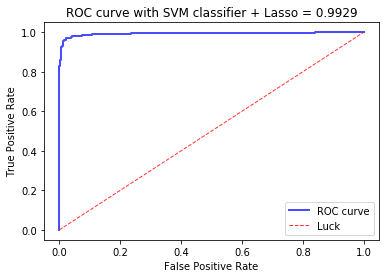

In [51]:
plt.plot(fpr3, tpr3, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with SVM classifier + Lasso = '+str(np.round(auc_svm_l,4)))
plt.show()

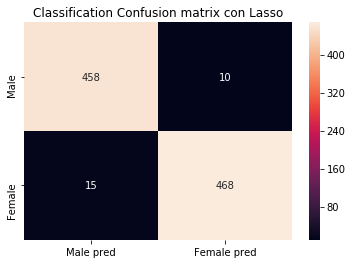

In [52]:
cm_svm_l = confusion_matrix(ytest, ypred_svm_test_l)
df_svm_l = pd.DataFrame(cm_svm_l, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_svm_l, annot=True, fmt='g')
plt.title('Classification Confusion matrix con Lasso')
plt.show()

# RFE

In [53]:
svm_cv.fit(xtrain_scal_red_rfe,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=True, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
print("Los mejores parametros son: ",svm_cv.best_params_, svm_cv.best_score_)

Los mejores parametros son:  {'C': 1} 0.9756427604871448


In [55]:
ypred_svm_train_r = svm_cv.predict(xtrain_scal_red_rfe) 
svm_score_train_r = accuracy_score(ytrain,ypred_svm_train_r)
print("El Accuracy Train con Threshold es " + str(svm_score_train_r))

El Accuracy Train con Threshold es 0.9756427604871448


In [56]:
ypred_svm_test_r = svm_cv.predict(xtest_scal_red_rfe) 
svm_score_test_r = accuracy_score(ytest,ypred_svm_test_r)
print("El Accuracy Test con Threshold es " + str(svm_score_test_r))

El Accuracy Test con Threshold es 0.9747634069400631


In [57]:
yproba_svm_test_r = svm_cv.predict_proba(xtest_scal_red_rfe)
fpr4, tpr4, thresholds = roc_curve(ytest.astype('int'), yproba_svm_test_r[:,1], drop_intermediate = False)
auc_svm_r = metrics.auc(fpr4, tpr4)
print("El AUC con Threshold es = " + str(auc_svm_r))

El AUC con Threshold es = 0.9933375802941021


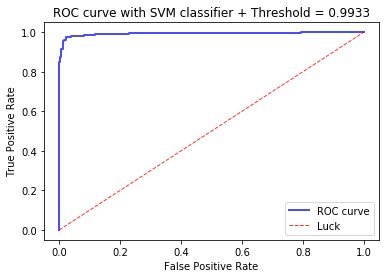

In [58]:
plt.plot(fpr4, tpr4, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with SVM classifier + Threshold = '+str(np.round(auc_svm_r,4)))
plt.show()

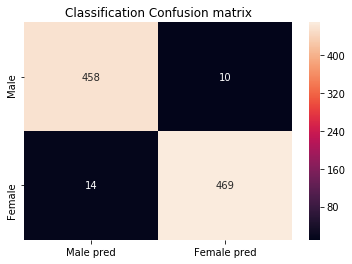

In [59]:
cm_svm_r = confusion_matrix(ytest, ypred_svm_test_r)
df_svm_r = pd.DataFrame(cm_svm_r, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_svm_r, annot=True, fmt='g')
plt.title('Classification Confusion matrix')
plt.show()

# --> KNN x 4 <--

In [60]:
parameters = {'n_neighbors':[1, 5, 10, 25, 50]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameters, refit = True ,cv = 5)

# NO FEATURE SELECTION

In [61]:
knn_cv.fit(xtrain_scal,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
print("Los mejores parametros son: ",knn_cv.best_params_, knn_cv.best_score_)

Los mejores parametros son:  {'n_neighbors': 5} 0.968425800631484


In [63]:
ypred_knn_train = knn_cv.predict(xtrain_scal) 
knn_score_train = accuracy_score(ytrain,ypred_knn_train)
print("El Accuracy Train sin FS es " + str(knn_score_train))

El Accuracy Train sin FS es 0.9837618403247632


In [64]:
ypred_knn_test = knn_cv.predict(xtest_scal) 
knn_score_test = accuracy_score(ytest,ypred_knn_test)
print("El Accuracy Test sin FS es " + str(knn_score_test))

El Accuracy Test sin FS es 0.9758149316508938


In [65]:
yproba_knn_test = knn_cv.predict_proba(xtest_scal)
fpr5, tpr5, thresholds = roc_curve(ytest.astype('int'), yproba_knn_test[:,1], drop_intermediate = False)
auc_knn = metrics.auc(fpr5, tpr5)
print("El AUC sin FS es = " + str(auc_knn))

El AUC sin FS es = 0.9929239440109004


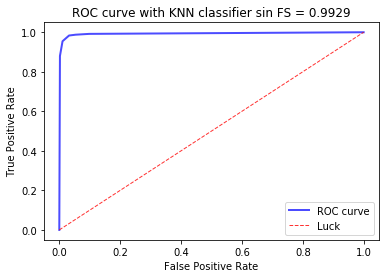

In [66]:
plt.plot(fpr5, tpr5, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN classifier sin FS = '+str(np.round(auc_knn,4)))
plt.show()

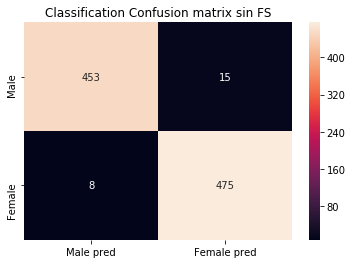

In [67]:
cm_knn = confusion_matrix(ytest, ypred_knn_test)
df_knn = pd.DataFrame(cm_knn, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_knn, annot=True, fmt='g')
plt.title('Classification Confusion matrix sin FS')
plt.show()

# THRESHOLD

In [68]:
knn_cv.fit(xtrain_scal_red_var,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [69]:
print("Los mejores parametros son: ",knn_cv.best_params_, knn_cv.best_score_)

Los mejores parametros son:  {'n_neighbors': 10} 0.6986919260261615


In [70]:
ypred_knn_train_t = knn_cv.predict(xtrain_scal_red_var) 
knn_score_train_t = accuracy_score(ytrain,ypred_knn_train_t)
print("El Accuracy Train con Threshold es " + str(knn_score_train_t))

El Accuracy Train con Threshold es 0.7645466847090663


In [71]:
ypred_knn_test_t = knn_cv.predict(xtest_scal_red_var) 
knn_score_test_t = accuracy_score(ytest,ypred_knn_test_t)
print("El Accuracy Test con Threshold es " + str(knn_score_test_t))

El Accuracy Test con Threshold es 0.6624605678233438


In [72]:
yproba_knn_test_t = knn_cv.predict_proba(xtest_scal_red_var)
fpr6, tpr6, thresholds = roc_curve(ytest.astype('int'), yproba_knn_test_t[:,1], drop_intermediate = False)
auc_knn_t = metrics.auc(fpr6, tpr6)
print("El AUC con Threshold es = " + str(auc_knn_t))

El AUC con Threshold es = 0.7429283679283679


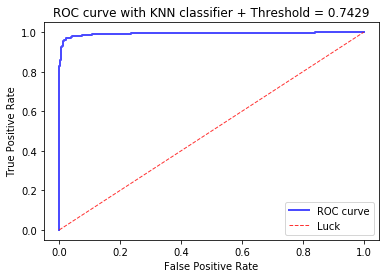

In [73]:
plt.plot(fpr3, tpr3, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN classifier + Threshold = '+str(np.round(auc_knn_t,4)))
plt.show()

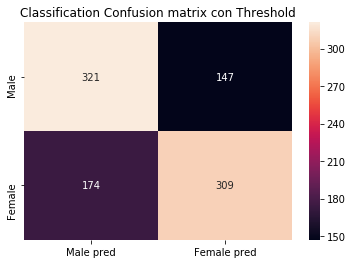

In [74]:
cm_knn_t = confusion_matrix(ytest, ypred_knn_test_t)
df_knn_t = pd.DataFrame(cm_knn_t, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_knn_t, annot=True, fmt='g')
plt.title('Classification Confusion matrix con Threshold')
plt.show()

# LASSO

In [129]:
knn_cv.fit(xtrain_scal_red_lasso,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [130]:
print("Los mejores parametros son: ",knn_cv.best_params_, knn_cv.best_score_)

Los mejores parametros son:  {'n_neighbors': 5} 0.9738385205232296


In [131]:
ypred_knn_train_l = knn_cv.predict(xtrain_scal_red_lasso) 
knn_score_train_l = accuracy_score(ytrain,ypred_knn_train_l)
print("El Accuracy Train con Lasso es " + str(knn_score_train_l))

El Accuracy Train con Lasso es 0.984212900315742


In [132]:
ypred_knn_test_l = knn_cv.predict(xtest_scal_red_lasso)
knn_score_test_l = accuracy_score(ytest,ypred_svm_test_l)
print("El Accuracy Test con Lasso es " + str(knn_score_test_l))

El Accuracy Test con Lasso es 0.9737118822292324


In [133]:
yproba_knn_test_l = knn_cv.predict_proba(xtest_scal_red_lasso)
fpr7, tpr7, thresholds = roc_curve(ytest.astype('int'), yproba_knn_test_l[:,1], drop_intermediate = False)
auc_knn_l = metrics.auc(fpr7, tpr7)
print("El AUC con Lasso es = " + str(auc_knn_l))

El AUC con Lasso es = 0.9910061757887845


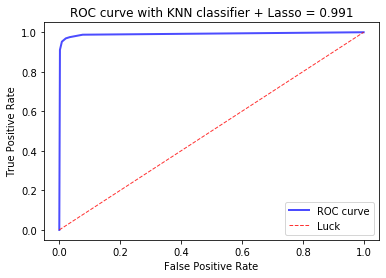

In [134]:
plt.plot(fpr7, tpr7, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN classifier + Lasso = '+str(np.round(auc_knn_l,4)))
plt.show()

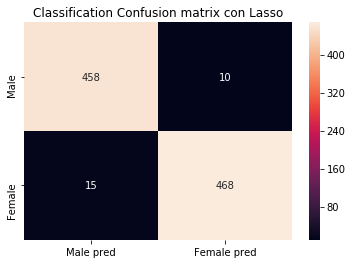

In [135]:
cm_knn_l = confusion_matrix(ytest, ypred_knn_test_l)
df_knn_l = pd.DataFrame(cm_knn_l, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_knn_l, annot=True, fmt='g')
plt.title('Classification Confusion matrix con Lasso')
plt.show()

# RFE

In [89]:
knn_cv.fit(xtrain_scal_red_rfe,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [90]:
print("Los mejores parametros son: ",knn_cv.best_params_, knn_cv.best_score_)

Los mejores parametros son:  {'n_neighbors': 5} 0.9778980604420388


In [91]:
ypred_knn_train_r = knn_cv.predict(xtrain_scal_red_rfe) 
knn_score_train_r = accuracy_score(ytrain,ypred_knn_train_r)
print("El Accuracy Train con RFE es " + str(knn_score_train_r))

El Accuracy Train con RFE es 0.9846639603067208


In [92]:
ypred_knn_test_r = knn_cv.predict(xtest_scal_red_rfe) 
knn_score_test_r = accuracy_score(ytest,ypred_knn_test_r)
print("El Accuracy Test con RFE es " + str(knn_score_test_r))

El Accuracy Test con RFE es 0.9747634069400631


In [93]:
yproba_knn_test_r = knn_cv.predict_proba(xtest_scal_red_rfe)
fpr8, tpr8, thresholds = roc_curve(ytest.astype('int'), yproba_knn_test_r[:,1], drop_intermediate = False)
auc_knn_r = metrics.auc(fpr8, tpr8)
print("El AUC con RFE es = " + str(auc_knn_r))

El AUC con RFE es = 0.9892167011732229


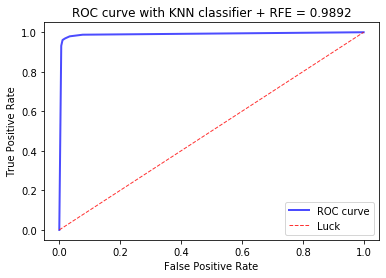

In [94]:
plt.plot(fpr8, tpr8, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN classifier + RFE = '+str(np.round(auc_knn_r,4)))
plt.show()

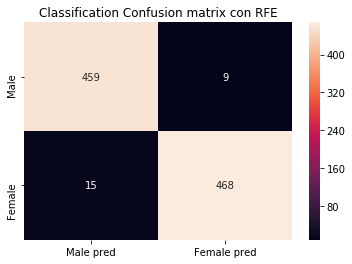

In [96]:
cm_knn_r = confusion_matrix(ytest, ypred_knn_test_r)
df_knn_r = pd.DataFrame(cm_knn_r, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_knn_r, annot=True, fmt='g')
plt.title('Classification Confusion matrix con RFE')
plt.show()

# --> LOGISTIC REGRESSION x 4 <--

In [97]:
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
parameters_lr = {'C':[1, 10]}
lr_cv = GridSearchCV(lr_model, param_grid = parameters_lr, refit = True, cv = 5)

# NO FEATURE SELECTION

In [98]:
lr_cv.fit(xtrain_scal,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
print("Los mejores parametros son: ",lr_cv.best_params_, lr_cv.best_score_)

Los mejores parametros son:  {'C': 1} 0.972936400541272


In [100]:
ypred_lr_train = lr_cv.predict(xtrain_scal) 
lr_score_train = accuracy_score(ytrain,ypred_lr_train)
print("El Accuracy Train sin FS es " + str(lr_score_train))

El Accuracy Train sin FS es 0.9760938204781235


In [101]:
ypred_lr_test = lr_cv.predict(xtest_scal) 
lr_score_test = accuracy_score(ytest,ypred_lr_test)
print("El Accuracy Test sin FS es " + str(lr_score_test))

El Accuracy Test sin FS es 0.9716088328075709


In [102]:
yproba_lr_test = lr_cv.predict_proba(xtest_scal)
fpr9, tpr9, thresholds = roc_curve(ytest.astype('int'), yproba_lr_test[:,1], drop_intermediate = False)
auc_lr = metrics.auc(fpr9, tpr9)
print("El AUC sin FS es = " + str(auc_lr))

El AUC sin FS es = 0.9937003415264285


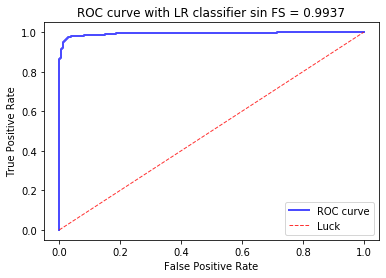

In [103]:
plt.plot(fpr9, tpr9, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LR classifier sin FS = '+str(np.round(auc_lr,4)))
plt.show()

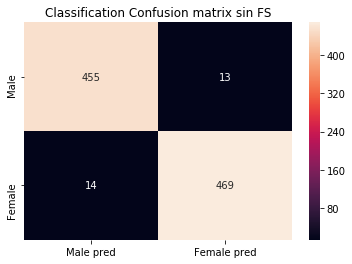

In [104]:
cm_lr = confusion_matrix(ytest, ypred_lr_test)
df_lr = pd.DataFrame(cm_lr, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_lr, annot=True, fmt='g')
plt.title('Classification Confusion matrix sin FS')
plt.show()

# THRESHOLD

In [105]:
lr_cv.fit(xtrain_scal_red_var,ytrain.ravel())

C:\Users\norni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\norni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\norni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\norni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\norni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
print("Los mejores parametros son: ",lr_cv.best_params_, lr_cv.best_score_)

Los mejores parametros son:  {'C': 10} 0.8001804239963916


In [107]:
ypred_lr_train_t = lr_cv.predict(xtrain_scal_red_var) 
lr_score_train_t = accuracy_score(ytrain,ypred_lr_train_t)
print("El Accuracy Train con Threshold es " + str(lr_score_train_t))

El Accuracy Train con Threshold es 0.7830401443391971


In [108]:
ypred_lr_test_t = lr_cv.predict(xtest_scal_red_var) 
lr_score_test_t = accuracy_score(ytest,ypred_lr_test_t)
print("El Accuracy Test con Threshold es " + str(lr_score_test_t))

El Accuracy Test con Threshold es 0.7770767613038907


In [109]:
yproba_lr_test_t = lr_cv.predict_proba(xtest_scal_red_var)
fpr10, tpr10, thresholds = roc_curve(ytest.astype('int'), yproba_lr_test_t[:,1], drop_intermediate = False)
auc_lr_t = metrics.auc(fpr10, tpr10)
print("El AUC con Threshold es = " + str(auc_lr_t))

El AUC con Threshold es = 0.8185928403319709


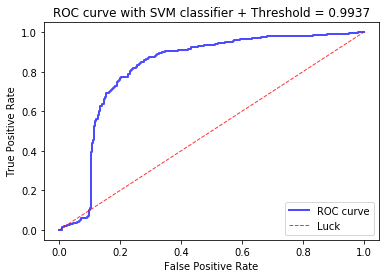

In [111]:
plt.plot(fpr10, tpr10, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with SVM classifier + Threshold = '+str(np.round(auc_lr,4)))
plt.show()

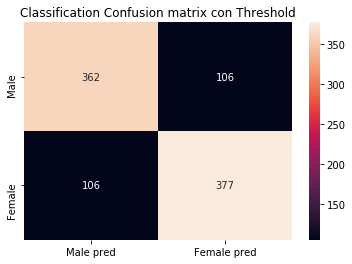

In [112]:
cm_lr_t = confusion_matrix(ytest, ypred_lr_test_t)
df_lr_t = pd.DataFrame(cm_lr_t, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_lr_t, annot=True, fmt='g')
plt.title('Classification Confusion matrix con Threshold')
plt.show()

# LASSO

In [113]:
lr_cv.fit(xtrain_scal_red_lasso,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [114]:
print("Los mejores parametros son: ",lr_cv.best_params_, lr_cv.best_score_)

Los mejores parametros son:  {'C': 10} 0.9747406405051872


In [115]:
ypred_lr_train_l = lr_cv.predict(xtrain_scal_red_lasso) 
lr_score_train_l = accuracy_score(ytrain,ypred_lr_train_l)
print("El Accuracy Train con Lasso es " + str(lr_score_train_l))

El Accuracy Train con Lasso es 0.9742895805142084


In [116]:
ypred_lr_test_l = lr_cv.predict(xtest_scal_red_lasso) 
lr_score_test_l = accuracy_score(ytest,ypred_lr_test_l)
print("El Accuracy Test con Lasso es " + str(lr_score_test_l))

El Accuracy Test con Lasso es 0.9716088328075709


In [117]:
yproba_lr_test_l = lr_cv.predict_proba(xtest_scal_red_lasso)
fpr11, tpr11, thresholds = roc_curve(ytest.astype('int'), yproba_lr_test_l[:,1], drop_intermediate = False)
auc_lr_l = metrics.auc(fpr11, tpr11)
print("El AUC con Lasso es = " + str(auc_lr_l))

El AUC con Lasso es = 0.9929615473093735


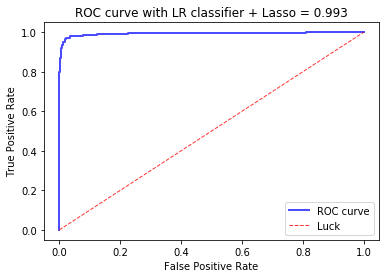

In [118]:
plt.plot(fpr11, tpr11, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LR classifier + Lasso = '+str(np.round(auc_lr_l,4)))
plt.show()

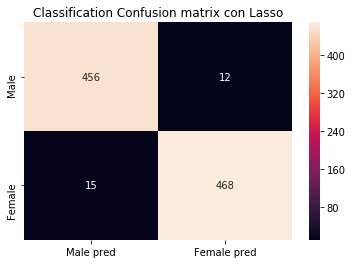

In [119]:
cm_lr_l = confusion_matrix(ytest, ypred_lr_test_l)
df_lr_l = pd.DataFrame(cm_lr_l, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_lr_l, annot=True, fmt='g')
plt.title('Classification Confusion matrix con Lasso')
plt.show()

# RFE

In [120]:
lr_cv.fit(xtrain_scal_red_rfe,ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:
print("Los mejores parametros son: ",lr_cv.best_params_, lr_cv.best_score_)

Los mejores parametros son:  {'C': 1} 0.9733874605322508


In [122]:
ypred_lr_train_r = lr_cv.predict(xtrain_scal_red_rfe) 
lr_score_train_r = accuracy_score(ytrain,ypred_lr_train_r)
print("El Accuracy Train con RFE es " + str(lr_score_train_r))

El Accuracy Train con RFE es 0.9733874605322508


In [124]:
ypred_lr_test_r = lr_cv.predict(xtest_scal_red_rfe) 
lr_score_test_r = accuracy_score(ytest,ypred_lr_test_r)
print("El Accuracy Test con RFE es " + str(lr_score_test_r))

El Accuracy Test con RFE es 0.9737118822292324


In [125]:
yproba_lr_test_r = lr_cv.predict_proba(xtest_scal_red_rfe)
fpr12, tpr12, thresholds = roc_curve(ytest.astype('int'), yproba_lr_test_r[:,1], drop_intermediate = False)
auc_lr_r = metrics.auc(fpr12, tpr12)
print("El AUC con RFE es = " + str(auc_lr_r))

El AUC con RFE es = 0.9934614499831892


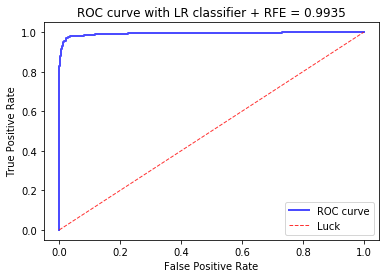

In [126]:
plt.plot(fpr12, tpr12, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LR classifier + RFE = '+str(np.round(auc_lr_r,4)))
plt.show()

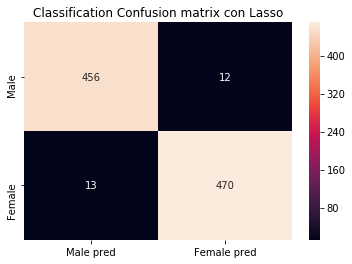

In [127]:
cm_lr_r = confusion_matrix(ytest, ypred_lr_test_r)
df_lr_r = pd.DataFrame(cm_lr_r, index = ['Male', 'Female'], columns = ['Male pred', 'Female pred'])
plt.figure(figsize = (6,4))
sns.heatmap(df_lr_r, annot=True, fmt='g')
plt.title('Classification Confusion matrix con Lasso')
plt.show()

# BEST OPTION

In [136]:
print("La mejor variante es KNN con Feature Selection LASSO, siendo sus resultados los siguientes:")
print()
print("El Accuracy Train con Lasso es " + str(knn_score_train_l))
print("El Accuracy Train con Lasso es " + str(knn_score_test_l))
print("El AUC con Lasso es = " + str(auc_knn_l))

La mejor variante es KNN con Feature Selection LASSO, siendo sus resultados los siguientes:

El Accuracy Train con Lasso es 0.984212900315742
El Accuracy Train con Lasso es 0.9737118822292324
El AUC con Lasso es = 0.9910061757887845
